In [1]:
import numpy as np
from SuperlatticeTMM.cavities import OpticalCavity
from SuperlatticeTMM.superlattice import Superlattice
import matplotlib.pyplot as plt
from materials import Air,GaAs,AlAs

In [13]:
wl_DBR = 900
wl_range = np.arange(870,930,0.125)
op = OpticalCavity([GaAs,AlAs],[wl_DBR/4./GaAs.n,wl_DBR/4./AlAs.n],900,entry=GaAs,exit=GaAs, p=(12,12), spacer=(GaAs,wl_DBR/GaAs.n))
refs = np.array(op.calc_spectra(wl_range))

In [14]:
ix = np.where(np.isclose(wl_range,wl_DBR))[0][0]
i = 1
while True:
    if abs((refs[ix+i]-refs[ix+i-1])/refs[ix+i-1]) < 1/100:
        break
    i +=1

In [16]:
def _Lorentzian(x, amp1, wid1, x0):
    return 1-(amp1*wid1/((x-x0)**2+wid1**2))

In [17]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(_Lorentzian, wl_range[ix-i:ix+i+1], refs[ix-i:ix+i+1])
popt

array([  1.1261368 ,   1.12660247, 900.00125776])

In [18]:
np.linalg.cond(pcov)

7.921783511809746

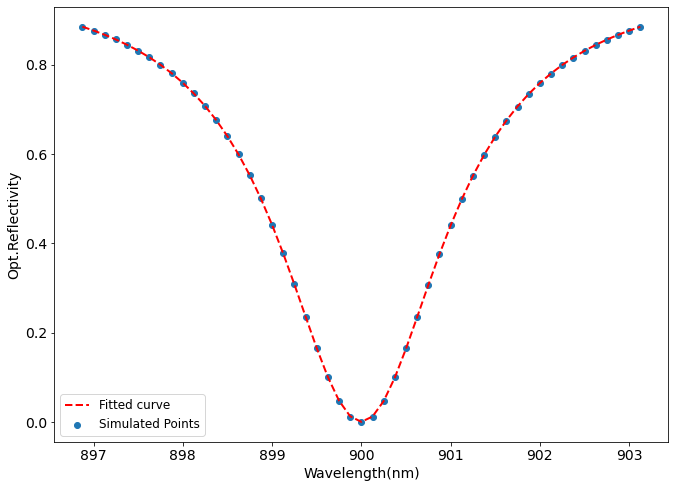

In [22]:
plt.figure(figsize=(11,8))
plt.scatter(wl_range[ix-i:ix+i+1],refs[ix-i:ix+i+1],label="Simulated Points")
plt.plot(wl_range[ix-i:ix+i+1], _Lorentzian(wl_range[ix-i:ix+i+1], *popt),'r--',label="Fitted curve",lw=2)
plt.xlabel("Wavelength(nm)",fontsize=14)
plt.ylabel("Opt.Reflectivity",fontsize=14)
plt.annotate(r"$y(x)=1- \frac{%.2f}{(x-%.f)^2+%.2f^2}$"%(popt[0]*popt[1],popt[2],popt[1]),(868.7,0.7),fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [23]:
Q = wl_DBR/(2*popt[1])
Q

399.43104398536605